# Validating NN Model

Using validation curves to validate the model performance 

In [3]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# from init_NN import NeuralNetwork

#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

Testing Model with Learning Rate 0.001 using Gradient Descent

In [4]:
lr = 0.001
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns

nn_lr001_gd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)
losses = nn_lr001_gd.train(training_images, training_labels, epochs = 10, batch_size=len(training_images), debug=True)
nn_lr001_gd_cross_ent_error, nn_lr001_gd_classification_error = nn_lr001_gd.test(test_images, test_labels)

 10%|█         | 1/10 [00:38<05:46, 38.55s/it]

epoch loss:  592.2592923223833


 20%|██        | 2/10 [01:16<05:05, 38.14s/it]

epoch loss:  519.361889492234


 30%|███       | 3/10 [01:54<04:25, 37.90s/it]

epoch loss:  469.7056357546673


 40%|████      | 4/10 [02:34<03:53, 39.00s/it]

epoch loss:  433.6520785112224


 50%|█████     | 5/10 [03:14<03:16, 39.24s/it]

epoch loss:  406.5798986090335


 60%|██████    | 6/10 [03:53<02:37, 39.37s/it]

epoch loss:  385.3924713638984


 70%|███████   | 7/10 [04:34<01:58, 39.58s/it]

epoch loss:  368.3343045484118


 80%|████████  | 8/10 [05:15<01:20, 40.23s/it]

epoch loss:  354.1712431706034


 90%|█████████ | 9/10 [05:55<00:40, 40.17s/it]

epoch loss:  342.11810116209244


100%|██████████| 10/10 [06:38<00:00, 39.83s/it]


epoch loss:  331.67825681530184
Average cross entropy loss: 321.73715794838137
Classification accuracy: 16.74%


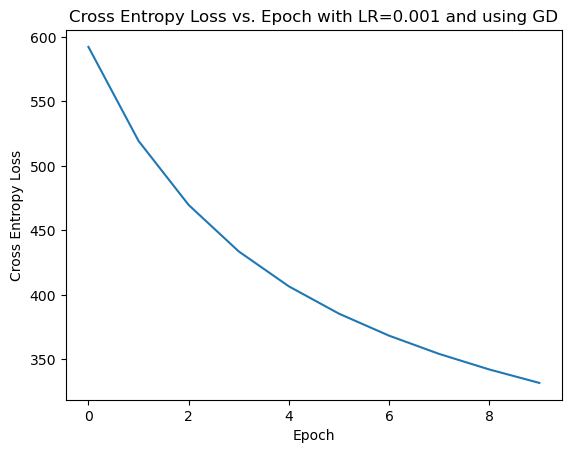

In [5]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.001 and using GD')
plt.show()

In [6]:
error_summary = stats.describe(nn_lr001_gd_cross_ent_error)
print("mean: ", np.mean(nn_lr001_gd_cross_ent_error))
print("median: ", np.median(nn_lr001_gd_cross_ent_error))
print("min: ", np.min(nn_lr001_gd_cross_ent_error))
print("max: ", np.max(nn_lr001_gd_cross_ent_error))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(nn_lr001_gd_cross_ent_error, q=[10, 25, 50, 75, 90]))
# print("mean: ", np.median(test_loss))

mean:  321.73715794838137
median:  273.5976843720411
min:  -0.0
max:  1874.9527012451636
variance:  82706.24243034392
skewness:  1.0130045395470515
kurtosis:  0.9281977714797276
quartile:  [ -0.          79.6238591  273.59768437 486.75533547 718.28025113]


In [7]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import Dataset
import process_MNIST
from init_Pytorch_NN import FeedForwardNN
from scipy import stats
import numpy as np

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = len(training_data)

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
# lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
input_size = 784  # Example: 28x28 pixels for MNIST dataset
hidden_size = [128, 64]
num_classes = 10  # Example: Number of classes for MNIST dataset
learning_rate = 0.001
num_epochs = 10

#initialize NN 
# nn = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy)
model = FeedForwardNN(input_size, hidden_size, num_classes)

##train NN (example uses mini-batch)
# nn.train(training_images, training_labels, epochs = 10, batch_size=1)
# model.train(num_epochs, batch_size=1, learning_rate=learning_rate,  training_data=training_data)
model.train(num_epochs, batch_size=input_size, learning_rate=learning_rate,  train_dataloader=train_dataloader)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1


1it [00:04,  4.26s/it][00:00<?, ?it/s]
 10%|█         | 1/10 [00:04<00:38,  4.26s/it]

batch loss:  [2.304809331893921]
epoch loss:  2.304809331893921


1it [00:04,  4.19s/it]
 20%|██        | 2/10 [00:08<00:33,  4.22s/it]

batch loss:  [2.3047773838043213]
epoch loss:  2.3047773838043213


1it [00:04,  4.41s/it]
 30%|███       | 3/10 [00:12<00:30,  4.31s/it]

batch loss:  [2.3047451972961426]
epoch loss:  2.3047451972961426


1it [00:04,  4.61s/it]
 40%|████      | 4/10 [00:17<00:26,  4.43s/it]

batch loss:  [2.304713010787964]
epoch loss:  2.304713010787964


1it [00:04,  4.59s/it]
 50%|█████     | 5/10 [00:22<00:22,  4.49s/it]

batch loss:  [2.304680585861206]
epoch loss:  2.304680585861206


1it [00:04,  4.72s/it]
 60%|██████    | 6/10 [00:26<00:18,  4.57s/it]

batch loss:  [2.3046483993530273]
epoch loss:  2.3046483993530273


1it [00:04,  4.58s/it]
 70%|███████   | 7/10 [00:31<00:13,  4.58s/it]

batch loss:  [2.3046164512634277]
epoch loss:  2.3046164512634277


1it [00:05,  5.37s/it]
 80%|████████  | 8/10 [00:36<00:09,  4.83s/it]

batch loss:  [2.304583787918091]
epoch loss:  2.304583787918091


1it [00:04,  4.83s/it]
 90%|█████████ | 9/10 [00:41<00:04,  4.83s/it]

batch loss:  [2.304551839828491]
epoch loss:  2.304551839828491


1it [00:04,  4.12s/it]
100%|██████████| 10/10 [00:45<00:00,  4.57s/it]

batch loss:  [2.3045194149017334]
epoch loss:  2.3045194149017334
Training complete.


[2.304809331893921,
 2.3047773838043213,
 2.3047451972961426,
 2.304713010787964,
 2.304680585861206,
 2.3046483993530273,
 2.3046164512634277,
 2.304583787918091,
 2.304551839828491,
 2.3045194149017334]

In [8]:

##test NN
# cross_ent_error, classification_error = nn.test(test_images, test_labels)
cross_ent_errors, classification_matches = model.test(test_dataloader, input_size=input_size)
classification_matches_fixed = [x[0] for x in classification_matches]

print('Average cross entropy loss:', np.mean(cross_ent_errors))
print(f"Classification accuracy: {(sum(classification_matches_fixed)/test_data.test_labels.size(0))*100}%")

Average cross entropy loss: 2.3044028
Classification accuracy: 13.54%


C:\Users\pcher\AppData\Roaming\Python\Python310\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [9]:
error_summary = stats.describe(cross_ent_errors)
print("mean: ", np.mean(cross_ent_errors))
print("median: ", np.median(cross_ent_errors))
print("min: ", np.min(cross_ent_errors))
print("max: ", np.max(cross_ent_errors))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

mean:  2.3044028
median:  2.3044028
min:  2.3044028
max:  2.3044028
variance:  nan
skewness:  nan
kurtosis:  nan
quartile:  [2.30440283 2.30440283 2.30440283 2.30440283 2.30440283]


C:\Users\pcher\AppData\Local\Temp\ipykernel_29864\44925478.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  error_summary = stats.describe(cross_ent_errors)
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1522: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
c:\ProgramData\anaconda3\lib\site-packa